<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_PA_Lab9_and_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Without GA**

The temperature data is sourced from NASA's POWER Project, and the rainfall data is obtained from the Humanitarian Data Exchange (HDX) website, specifically focusing on Bangladesh rainfall data

The dataset is structured into the following columns:

tem: Average temperature for the month.
Month: The month for the data point, ranging from 1 (January) to 12 (December).
Year: The year of the data point.
rain: Total rainfall for the month.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/Temp_and_rain.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.2 KB


In [8]:
df.head(5)

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


Dataset Head:
       tem      rain       Date  Month  Year
0  16.9760   18.5356 1901-01-01      1  1901
1  19.9026   16.2548 1901-02-01      2  1901
2  24.3158   70.7981 1901-03-01      3  1901
3  28.1834   66.1616 1901-04-01      4  1901
4  27.8892  267.2150 1901-05-01      5  1901

Missing Values:
tem     0
rain    0
Date    0
dtype: int64


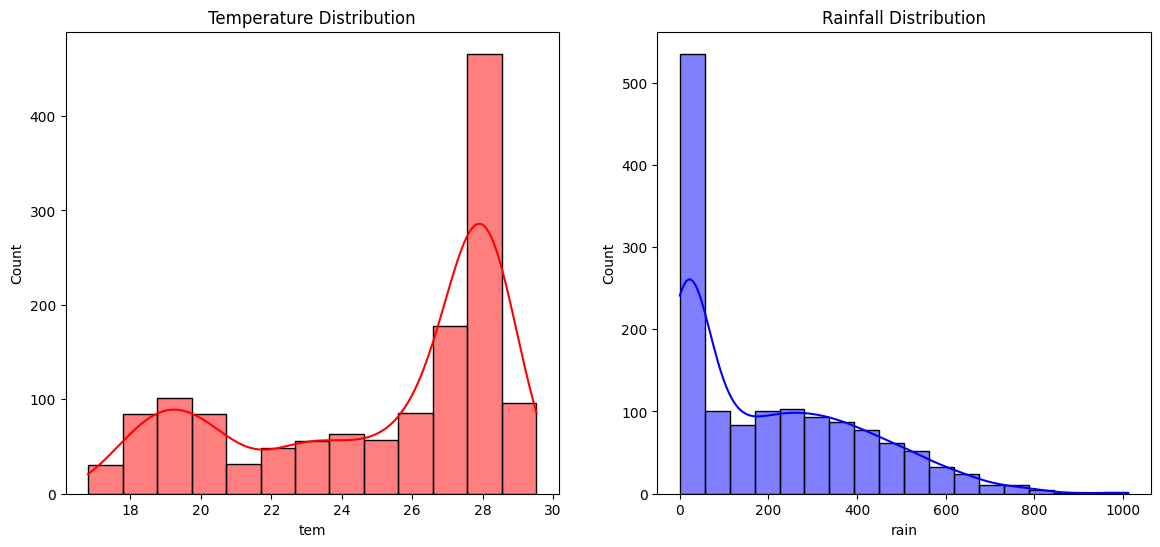

In [10]:
# Load and inspect the dataset (df is already loaded)
print("Dataset Head:")
print(df.head())

# Data Preprocessing
# Convert 'Month' and 'Year' into datetime format for better analysis
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df.sort_values(by='Date')

# Drop 'Year' and 'Month' columns as they're now represented in 'Date'
df = df.drop(columns=['Year', 'Month'])

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of Temperature and Rainfall
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['tem'], kde=True, color='red')
plt.title('Temperature Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['rain'], kde=True, color='blue')
plt.title('Rainfall Distribution')
plt.show()

# Feature Engineering
# Extract features from the date
# (e.g., month, year, and seasonality can be useful predictors)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Define features and target variables
X = df[['Month', 'Year']]
X = pd.concat([X, df['tem']], axis=1)  # Use temperature as an additional feature
y = df['rain']  # Rainfall is the target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Random Forest as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

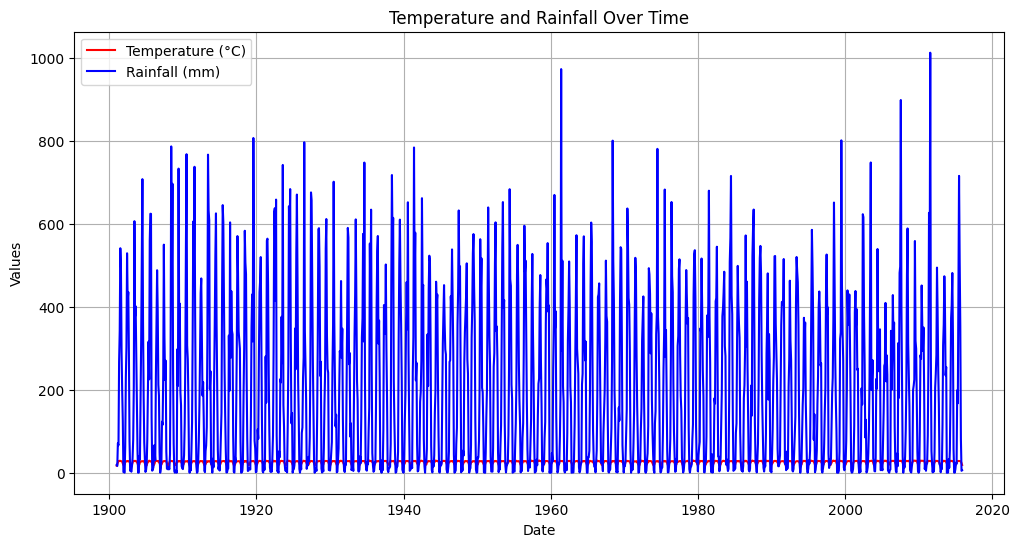

In [11]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['tem'], label='Temperature (°C)', color='r')
plt.plot(df['Date'], df['rain'], label='Rainfall (mm)', color='b')
plt.title('Temperature and Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [12]:
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 7830.164929417387
Mean Absolute Error (MAE): 55.777919582608696
R^2 Score: 0.8167470943022581


<ipython-input-13-282a3095ecf0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


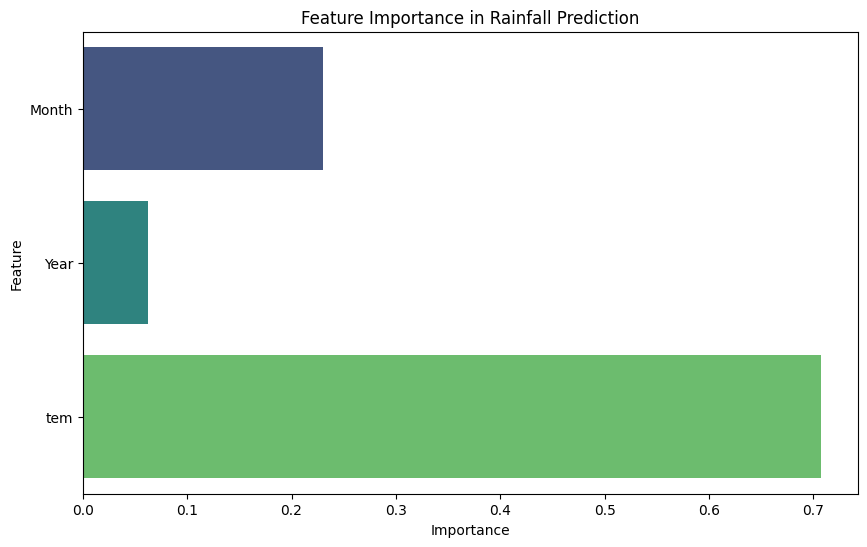

In [13]:
# Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_importance = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title('Feature Importance in Rainfall Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


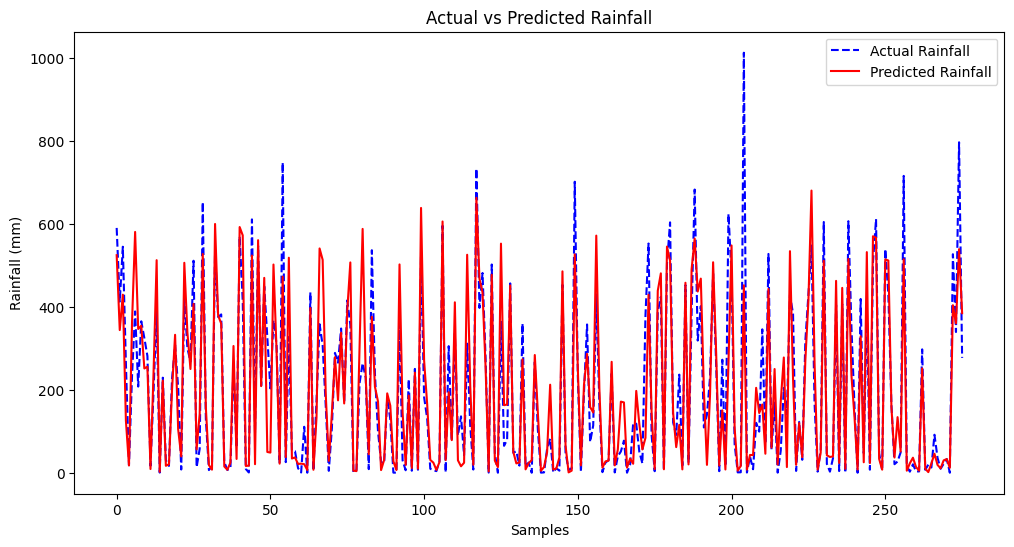

In [14]:
# Visualizing Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Rainfall', color='blue', linestyle='dashed')
plt.plot(y_pred, label='Predicted Rainfall', color='red', linestyle='solid')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Samples')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

**With GA**

In [16]:
! pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.2 MB/s eta 0:00:00


Dataset Head:
       tem      rain       Date  Month  Year
0  16.9760   18.5356 1901-01-01      1  1901
1  19.9026   16.2548 1901-02-01      2  1901
2  24.3158   70.7981 1901-03-01      3  1901
3  28.1834   66.1616 1901-04-01      4  1901
4  27.8892  267.2150 1901-05-01      5  1901


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

Best Hyperparameters: n_estimators=179, max_depth=5

Optimized Model Evaluation Metrics:
Mean Squared Error (MSE): 7170.585458240836
Mean Absolute Error (MAE): 53.7395011628999
R^2 Score: 0.8321835321961246


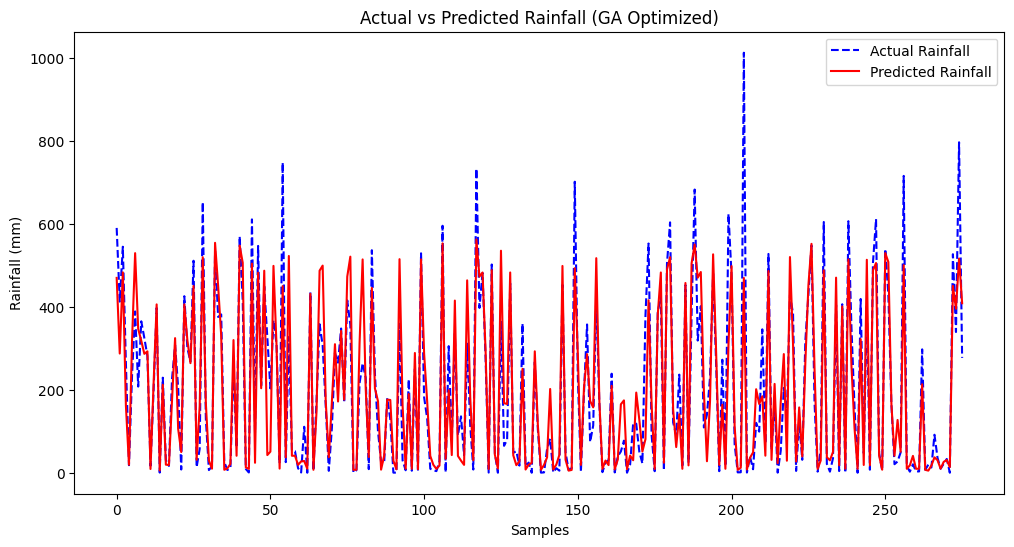

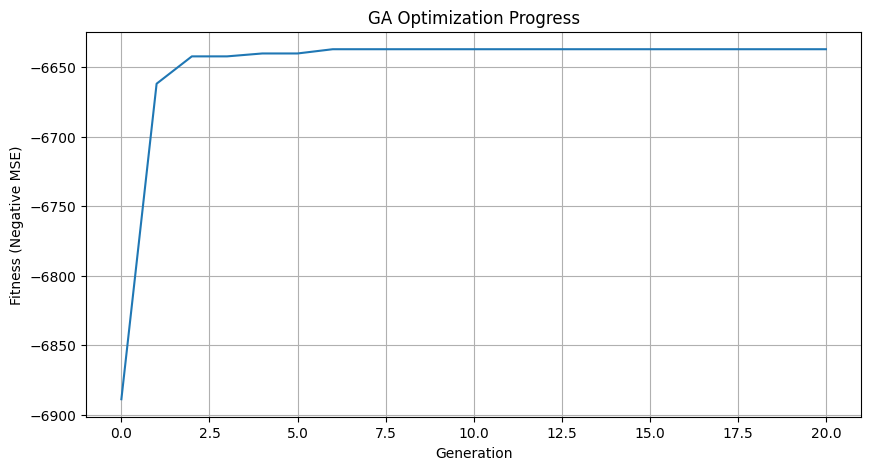

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pygad

# Load the dataset (df is already loaded)
print("Dataset Head:")
print(df.head())

# Preprocessing
# Convert 'Month' and 'Year' into datetime format for better analysis
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df.sort_values(by='Date')
df = df.drop(columns=['Year', 'Month'])

# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
X = df[['Month', 'Year', 'tem']]
y = df['rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function for GA optimization
def fitness_function(ga_instance, solution, solution_idx):
    n_estimators = int(solution[0])
    max_depth = int(solution[1])

    # Ensure parameters are within valid ranges
    n_estimators = max(10, min(n_estimators, 200))
    max_depth = max(2, min(max_depth, 30))

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)

    return mean_score  # Maximizing the negative MSE

# Define GA parameters
ga_instance = pygad.GA(
    num_generations=20,
    num_parents_mating=5,
    fitness_func=fitness_function,
    sol_per_pop=10,
    num_genes=2,
    init_range_low=10,
    init_range_high=50,
    gene_space=[{'low': 10, 'high': 200}, {'low': 2, 'high': 30}],
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10
)

# Run GA
ga_instance.run()

# Extract the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
n_estimators_optimized = int(solution[0])
max_depth_optimized = int(solution[1])
print(f"Best Hyperparameters: n_estimators={n_estimators_optimized}, max_depth={max_depth_optimized}")

# Train the model with optimized hyperparameters
model_optimized = RandomForestRegressor(n_estimators=n_estimators_optimized, max_depth=max_depth_optimized, random_state=42)
model_optimized.fit(X_train, y_train)

# Predictions
y_pred = model_optimized.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nOptimized Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Visualize Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Rainfall', color='blue', linestyle='dashed')
plt.plot(y_pred, label='Predicted Rainfall', color='red', linestyle='solid')
plt.title('Actual vs Predicted Rainfall (GA Optimized)')
plt.xlabel('Samples')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

# Visualize GA Progress
plt.figure(figsize=(10, 5))
plt.plot(ga_instance.best_solutions_fitness)
plt.title('GA Optimization Progress')
plt.xlabel('Generation')
plt.ylabel('Fitness (Negative MSE)')
plt.grid()
plt.show()


In [20]:
print("\nOptimized Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")



Optimized Model Evaluation Metrics:
Mean Squared Error (MSE): 7170.585458240836
Mean Absolute Error (MAE): 53.7395011628999
R^2 Score: 0.8321835321961246


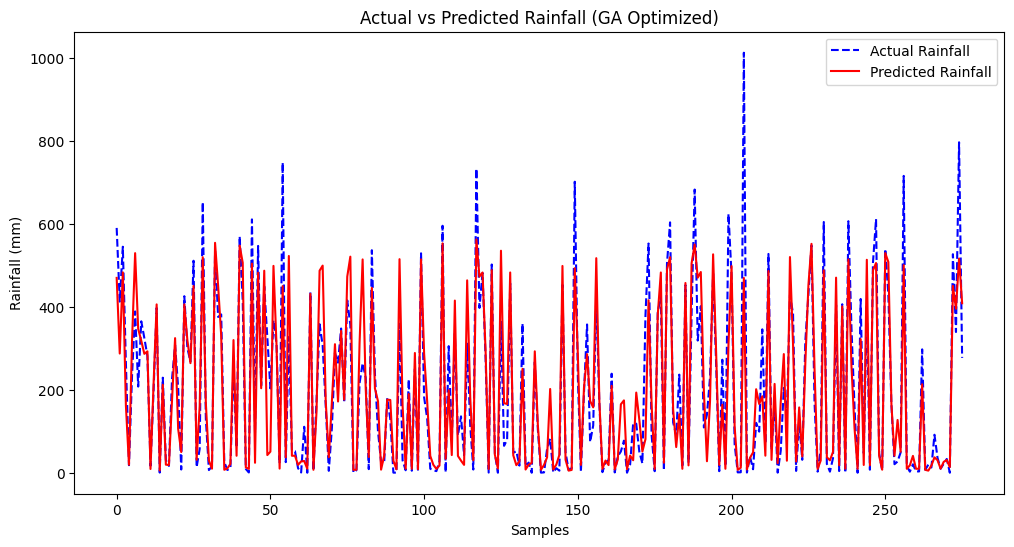

In [21]:
# Visualize Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Rainfall', color='blue', linestyle='dashed')
plt.plot(y_pred, label='Predicted Rainfall', color='red', linestyle='solid')
plt.title('Actual vs Predicted Rainfall (GA Optimized)')
plt.xlabel('Samples')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


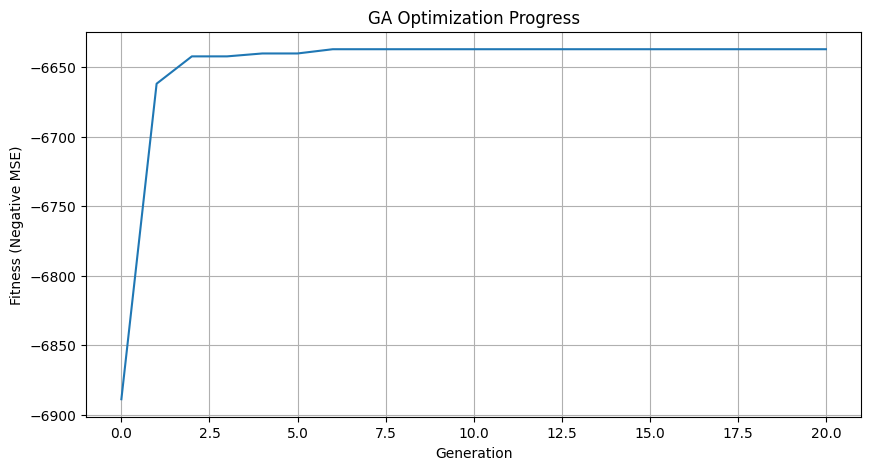

In [22]:

# Visualize GA Progress
plt.figure(figsize=(10, 5))
plt.plot(ga_instance.best_solutions_fitness)
plt.title('GA Optimization Progress')
plt.xlabel('Generation')
plt.ylabel('Fitness (Negative MSE)')
plt.grid()
plt.show()

1. Model without GA (Standard Random Forest):

    Mean Squared Error (MSE): 7830.16
    Mean Absolute Error (MAE): 55.78
    R² Score: 0.82

2. Model with GA (Random Forest with Optimized Hyperparameters):

    Mean Squared Error (MSE): 7170.59
    Mean Absolute Error (MAE): 53.74
    R² Score: 0.83

Key Observations:

    Improved Performance with GA:
        The MSE is reduced from 7830.16 to 7170.59 with the GA-optimized model, indicating a better fit of the model to the data.
        The MAE also decreases from 55.78 to 53.74, reflecting a smaller average error in predictions.
        The R² score increases from 0.82 to 0.83, suggesting that the optimized model explains slightly more of the variance in the data.

    GA's Impact on Hyperparameters:
        GA was used to optimize the hyperparameters, specifically the number of estimators (n_estimators) and maximum depth (max_depth) of the Random Forest model.
        By optimizing these hyperparameters, the model achieves a better trade-off between bias and variance, improving its performance.

The Genetic Algorithm optimization led to a noticeable improvement in the model's performance, reducing error metrics and increasing the model's ability to explain variance. This suggests that hyperparameter tuning using GA is an effective strategy to enhance predictive models, particularly for complex tasks like forecasting rainfall.